#NAIVE STRING MATCHING

In [1]:
def naive_string_matcher(text, pattern):
    """
    Naive String Matching Algorithm.

    Parameters:
        text (str): The text in which to search for the pattern.
        pattern (str): The pattern to search for in the text.

    Returns:
        List[int]: Starting indices where the pattern is found in the text.
    """
    n = len(text)
    m = len(pattern)
    matches = []

    # Slide pattern over text
    for s in range(n - m + 1):
        # Check if pattern matches substring
        if text[s:s + m] == pattern:
            matches.append(s)
            print(f"Pattern occurs with shift {s}")

    return matches

# Example usage
text = "abcabcabc"
pattern = "abc"
matches = naive_string_matcher(text, pattern)
print("Matches found at shifts:", matches)


Pattern occurs with shift 0
Pattern occurs with shift 3
Pattern occurs with shift 6
Matches found at shifts: [0, 3, 6]


##NAIVE STRING BENCHMARKING

In [2]:
import time
import random
import string

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Benchmarking function
def benchmark_naive_string_matcher():
    text_length = 100000
    pattern_length = 100
    text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

    start_time = time.time()
    naive_string_matcher(text, pattern)
    end_time = time.time()

    print(f"Benchmarking Naive String Matcher: Text Length={text_length}, Pattern Length={pattern_length}")
    print(f"Time Taken: {end_time - start_time:.5f} seconds")

# Run the benchmark
benchmark_naive_string_matcher()


Benchmarking Naive String Matcher: Text Length=100000, Pattern Length=100
Time Taken: 0.10345 seconds


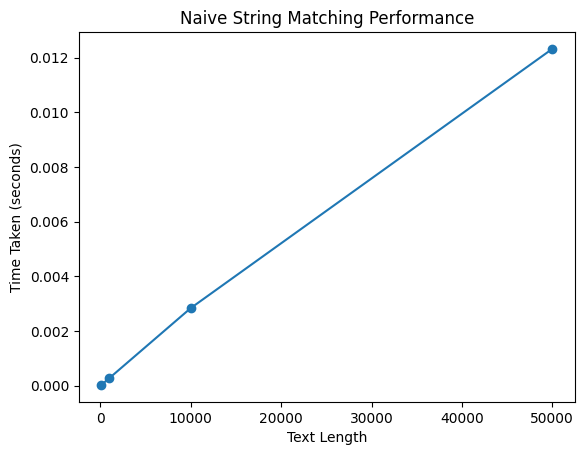

In [3]:
import matplotlib.pyplot as plt

def visualize_naive_string_matching():
    text_lengths = [100, 1000, 10000, 50000]
    pattern_length = 10
    times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        start_time = time.time()
        naive_string_matcher(text, pattern)
        end_time = time.time()

        times.append(end_time - start_time)

    plt.plot(text_lengths, times, marker='o')
    plt.xlabel("Text Length")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Naive String Matching Performance")
    plt.show()

# Run the visualization
visualize_naive_string_matching()


#RABIN KARP


In [4]:
def rabin_karp_matcher(text, pattern, d=256, q=101):
    """
    Rabin-Karp String Matching Algorithm.

    Parameters:
        text (str): The text in which to search for the pattern.
        pattern (str): The pattern to search for in the text.
        d (int): Number of characters in the input alphabet (default: 256).
        q (int): A prime number used for modular arithmetic (default: 101).

    Returns:
        List[int]: Starting indices where the pattern is found in the text.
    """
    n = len(text)
    m = len(pattern)
    h = pow(d, m - 1) % q
    p = 0  # Hash value for the pattern
    t = 0  # Hash value for the text
    matches = []

    # Precompute hash values for pattern and initial substring of text
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    # Slide pattern over text
    for s in range(n - m + 1):
        # Check if hash values match
        if p == t:
            # Verify the match by comparing characters
            if text[s:s + m] == pattern:
                matches.append(s)
                print(f"Pattern occurs with shift {s}")

        # Compute the hash for the next substring
        if s < n - m:
            t = (d * (t - ord(text[s]) * h) + ord(text[s + m])) % q
            if t < 0:
                t += q  # Ensure hash value is non-negative

    return matches

# Example usage
text = "abcabc"
pattern = "abc"
matches = rabin_karp_matcher(text, pattern)
print("Matches found at shifts:", matches)


Pattern occurs with shift 0
Pattern occurs with shift 3
Matches found at shifts: [0, 3]


##RABIN KARP BENCHMARKING

In [ ]:
import time
import random
import string

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Benchmarking function
def benchmark_rabin_karp():
    text_length = 100000
    pattern_length = 100
    text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

    start_time = time.time()
    rabin_karp_matcher(text, pattern)
    end_time = time.time()

    print(f"Benchmarking Rabin-Karp Matcher: Text Length={text_length}, Pattern Length={pattern_length}")
    print(f"Time Taken: {end_time - start_time:.5f} seconds")

# Run the benchmark
benchmark_rabin_karp()


Benchmarking Rabin-Karp Matcher: Text Length=100000, Pattern Length=100
Time Taken: 0.10818 seconds


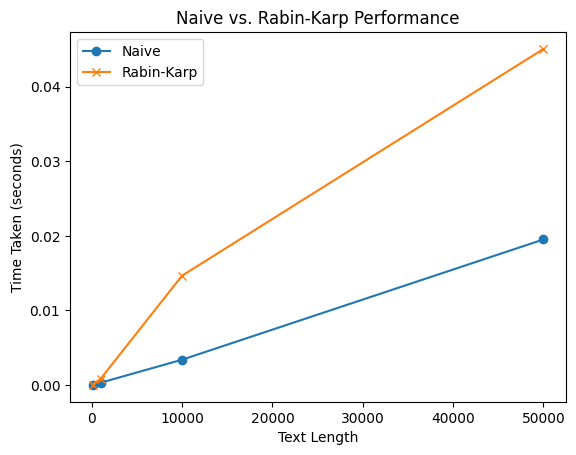

In [ ]:
import matplotlib.pyplot as plt

def compare_algorithms():
    text_lengths = [100, 1000, 10000, 50000]
    pattern_length = 10
    naive_times = []
    rabin_karp_times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        # Naive Matcher
        start_time = time.time()
        naive_string_matcher(text, pattern)
        end_time = time.time()
        naive_times.append(end_time - start_time)

        # Rabin-Karp Matcher
        start_time = time.time()
        rabin_karp_matcher(text, pattern)
        end_time = time.time()
        rabin_karp_times.append(end_time - start_time)

    plt.plot(text_lengths, naive_times, marker='o', label='Naive')
    plt.plot(text_lengths, rabin_karp_times, marker='x', label='Rabin-Karp')
    plt.xlabel("Text Length")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Naive vs. Rabin-Karp Performance")
    plt.legend()
    plt.show()

# Run the visualization
compare_algorithms()


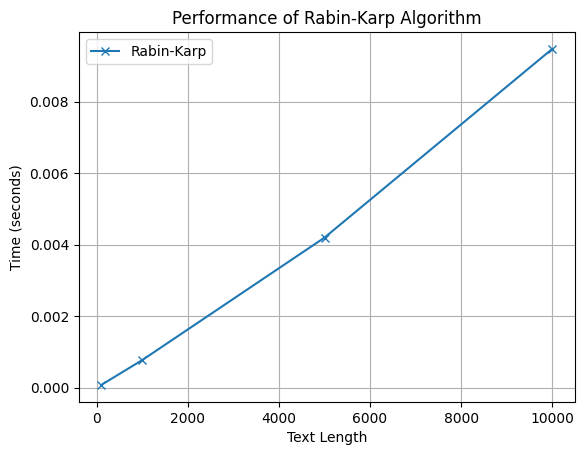

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Rabin-Karp Algorithm
def rabin_karp_matcher(text, pattern, d=256, q=101):
    """
    Rabin-Karp String Matching Algorithm.

    Parameters:
        text (str): The text to search within.
        pattern (str): The pattern to search for.
        d (int): The number of characters in the input alphabet (default: 256).
        q (int): A prime number used for hashing (default: 101).

    Returns:
        List[int]: Starting indices where the pattern is found in the text.
    """
    n = len(text)
    m = len(pattern)
    h = pow(d, m - 1) % q  # Value of d^(m-1) % q
    p = 0  # Hash value for the pattern
    t = 0  # Hash value for the text
    matches = []

    # Precompute the hash value for the pattern and the first window of text
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    # Slide the pattern over the text
    for s in range(n - m + 1):
        # If the hash values match, check the characters
        if p == t:
            if text[s:s + m] == pattern:
                matches.append(s)
        # Compute the hash value for the next window of text
        if s < n - m:
            t = (d * (t - ord(text[s]) * h) + ord(text[s + m])) % q
            if t < 0:  # Ensure the hash value is non-negative
                t += q

    return matches

# Benchmarking function for Rabin-Karp Algorithm
def benchmark_rabin_karp():
    text_lengths = [100, 1000, 5000, 10000]
    pattern_length = 10
    rabin_karp_times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        # Measure execution time for Rabin-Karp Algorithm
        start_time = time.time()
        rabin_karp_matcher(text, pattern)
        rabin_karp_times.append(time.time() - start_time)

    # Plot the results
    plt.plot(text_lengths, rabin_karp_times, label='Rabin-Karp', marker='x')
    plt.xlabel("Text Length")
    plt.ylabel("Time (seconds)")
    plt.title("Performance of Rabin-Karp Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Run the benchmark
benchmark_rabin_karp()


#FINITE AUTOMATON STRING MATCHING

In [13]:
def compute_transition_function(pattern, alphabet):
    """
    Preprocess the pattern to create a finite automaton transition function.

    Parameters:
        pattern (str): The pattern to preprocess.
        alphabet (set): The set of characters in the text and pattern.

    Returns:
        dict: A dictionary representing the transition function.
    """
    m = len(pattern)
    delta = {}

    for q in range(m + 1):  # q represents the current state
        for a in alphabet:  # a represents the input character
            # Find the longest prefix of pattern[:q] + a that is also a prefix of pattern
            k = min(q + 1, m)
            while k > 0 and not pattern[:k] == (pattern[:q] + a)[-k:]:
                k -= 1
            delta[(q, a)] = k

    return delta


def finite_automaton_matcher(text, pattern):
    """
    Finite Automaton String Matching Algorithm.

    Parameters:
        text (str): The text to search within.
        pattern (str): The pattern to search for.

    Returns:
        List[int]: Starting indices where the pattern is found in the text.
    """
    alphabet = set(text + pattern)  # Build the alphabet from text and pattern
    delta = compute_transition_function(pattern, alphabet)  # Preprocess pattern
    n = len(text)
    m = len(pattern)
    q = 0  # Start state
    matches = []

    for i in range(n):
        q = delta.get((q, text[i]), 0)  # Transition to the next state
        if q == m:  # If final state is reached, we found a match
            matches.append(i - m + 1)  # Store the starting index of the match

    return matches


# Test Case
text = "abcabacaabac"
pattern = "abaca"
matches = finite_automaton_matcher(text, pattern)
print("Matches found at shifts:", matches)


Matches found at shifts: [3]


##FINITE AUTOMATON BENCHMARKING

In [ ]:
import time
import random
import string

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Benchmarking function
def benchmark_finite_automaton():
    text_length = 100000
    pattern_length = 100
    text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

    start_time = time.time()
    finite_automaton_matcher(text, pattern)
    end_time = time.time()

    print(f"Benchmarking Finite Automaton Matcher: Text Length={text_length}, Pattern Length={pattern_length}")
    print(f"Time Taken: {end_time - start_time:.5f} seconds")

# Run the benchmark
benchmark_finite_automaton()


Benchmarking Finite Automaton Matcher: Text Length=100000, Pattern Length=100
Time Taken: 0.07831 seconds


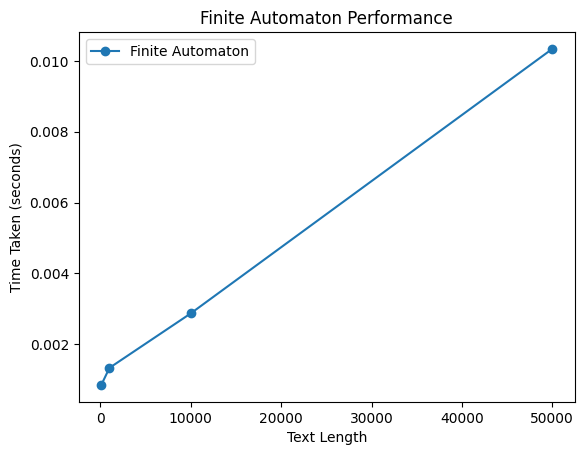

In [ ]:
import matplotlib.pyplot as plt

def compare_algorithms():
    text_lengths = [100, 1000, 10000, 50000]
    pattern_length = 10
    finite_automaton_times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        # Finite Automaton Matcher
        start_time = time.time()
        finite_automaton_matcher(text, pattern)
        end_time = time.time()
        finite_automaton_times.append(end_time - start_time)

    plt.plot(text_lengths, finite_automaton_times, marker='o', label='Finite Automaton')
    plt.xlabel("Text Length")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Finite Automaton Performance")
    plt.legend()
    plt.show()

# Run the visualization
compare_algorithms()


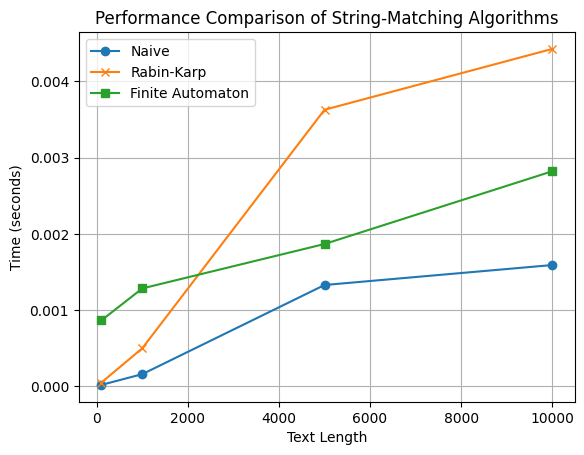

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Naive Algorithm
def naive_string_matcher(text, pattern):
    n = len(text)
    m = len(pattern)
    matches = []

    for s in range(n - m + 1):
        if text[s:s + m] == pattern:
            matches.append(s)
    return matches

# Rabin-Karp Algorithm
def rabin_karp_matcher(text, pattern, d=256, q=101):
    n = len(text)
    m = len(pattern)
    h = pow(d, m - 1) % q
    p = 0
    t = 0
    matches = []

    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    for s in range(n - m + 1):
        if p == t:
            if text[s:s + m] == pattern:
                matches.append(s)
        if s < n - m:
            t = (d * (t - ord(text[s]) * h) + ord(text[s + m])) % q
            if t < 0:
                t += q
    return matches

# Finite Automaton Algorithm
def compute_transition_function(pattern, alphabet):
    m = len(pattern)
    delta = {}

    for q in range(m + 1):
        for a in alphabet:
            k = min(m + 1, q + 2)
            while k > 0 and not (pattern[:k - 1] == pattern[q - k + 2:q + 1] + a):
                k -= 1
            delta[(q, a)] = k
    return delta

def finite_automaton_matcher(text, pattern):
    alphabet = set(text + pattern)
    delta = compute_transition_function(pattern, alphabet)
    n = len(text)
    m = len(pattern)
    q = 0
    matches = []

    for i in range(n):
        q = delta.get((q, text[i]), 0)
        if q == m:
            matches.append(i - m + 1)
    return matches

# Benchmark Function
def benchmark_algorithms():
    text_lengths = [100, 1000, 5000, 10000]
    pattern_length = 10
    naive_times = []
    rabin_karp_times = []
    finite_automaton_times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        # Benchmark Naive Algorithm
        start_time = time.time()
        naive_string_matcher(text, pattern)
        naive_times.append(time.time() - start_time)

        # Benchmark Rabin-Karp Algorithm
        start_time = time.time()
        rabin_karp_matcher(text, pattern)
        rabin_karp_times.append(time.time() - start_time)

        # Benchmark Finite Automaton Algorithm
        start_time = time.time()
        finite_automaton_matcher(text, pattern)
        finite_automaton_times.append(time.time() - start_time)

    # Plot results
    plt.plot(text_lengths, naive_times, label='Naive', marker='o')
    plt.plot(text_lengths, rabin_karp_times, label='Rabin-Karp', marker='x')
    plt.plot(text_lengths, finite_automaton_times, label='Finite Automaton', marker='s')
    plt.xlabel("Text Length")
    plt.ylabel("Time (seconds)")
    plt.title("Performance Comparison of String-Matching Algorithms")
    plt.legend()
    plt.grid()
    plt.show()

# Run Benchmark
benchmark_algorithms()


In [6]:
import time
import random
import string

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Finite Automaton Functions
def compute_transition_function(pattern, alphabet):
    m = len(pattern)
    delta = {}
    for q in range(m + 1):
        for a in alphabet:
            k = q
            while k > 0 and (pattern[:k] != (pattern[:q] + a)[-k:]):
                k -= 1
            delta[(q, a)] = k
    return delta

def finite_automaton_matcher(text, pattern):
    alphabet = set(text + pattern)
    delta = compute_transition_function(pattern, alphabet)
    n = len(text)
    m = len(pattern)
    q = 0
    for i in range(n):
        q = delta.get((q, text[i]), 0)
        if q == m:
            pass

# Benchmarking Finite Automaton Algorithm
def benchmark_finite_automaton():
    text_length = 100000
    pattern_length = 100
    text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

    start_time = time.time()
    finite_automaton_matcher(text, pattern)
    end_time = time.time()

    print(f"Benchmarking Finite Automaton Matcher: Text Length={text_length}, Pattern Length={pattern_length}")
    print(f"Time Taken: {end_time - start_time:.5f} seconds")

benchmark_finite_automaton()


Benchmarking Finite Automaton Matcher: Text Length=100000, Pattern Length=100
Time Taken: 0.08172 seconds


#KNUTH-MORRIS-PRATT

In [15]:
def compute_prefix_function(pattern):
    """
    Preprocess the pattern to create the prefix function.

    Parameters:
        pattern (str): The pattern to preprocess.

    Returns:
        List[int]: The prefix function for the pattern.
    """
    m = len(pattern)
    prefix = [0] * m
    k = 0

    for q in range(1, m):
        while k > 0 and pattern[k] != pattern[q]:
            k = prefix[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        prefix[q] = k

    return prefix


def kmp_matcher(text, pattern):
    """
    Knuth-Morris-Pratt String Matching Algorithm.

    Parameters:
        text (str): The text to search within.
        pattern (str): The pattern to search for.

    Returns:
        List[int]: Starting indices where the pattern is found in the text.
    """
    n = len(text)
    m = len(pattern)
    prefix = compute_prefix_function(pattern)
    q = 0  # Number of characters matched
    matches = []

    for i in range(n):
        while q > 0 and pattern[q] != text[i]:
            q = prefix[q - 1]  # Fall back in the pattern
        if pattern[q] == text[i]:
            q += 1  # Next character matched
        if q == m:
            matches.append(i - m + 1)
            print(f"Pattern occurs with shift {i - m + 1}")
            q = prefix[q - 1]  # Prepare for the next possible match

    return matches


# Example usage
text = "abaacabaaba"
pattern = "aba"
matches = kmp_matcher(text, pattern)
print("Matches found at shifts:", matches)


Pattern occurs with shift 0
Pattern occurs with shift 5
Pattern occurs with shift 8
Matches found at shifts: [0, 5, 8]


##KNUTH-MORRIS-PRATT BENCHMARKING

In [7]:
import time
import random
import string

# Generate random text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# KMP Functions
def compute_prefix_function(pattern):
    m = len(pattern)
    prefix = [0] * m
    k = 0
    for q in range(1, m):
        while k > 0 and pattern[k] != pattern[q]:
            k = prefix[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        prefix[q] = k
    return prefix

def kmp_matcher(text, pattern):
    n = len(text)
    m = len(pattern)
    prefix = compute_prefix_function(pattern)
    q = 0
    for i in range(n):
        while q > 0 and pattern[q] != text[i]:
            q = prefix[q - 1]
        if pattern[q] == text[i]:
            q += 1
        if q == m:
            q = prefix[q - 1]

# Benchmarking KMP Algorithm
def benchmark_kmp():
    text_length = 100000
    pattern_length = 100
    text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

    start_time = time.time()
    kmp_matcher(text, pattern)
    end_time = time.time()

    print(f"Benchmarking KMP Matcher: Text Length={text_length}, Pattern Length={pattern_length}")
    print(f"Time Taken: {end_time - start_time:.5f} seconds")

benchmark_kmp()


Benchmarking KMP Matcher: Text Length=100000, Pattern Length=100
Time Taken: 0.02895 seconds


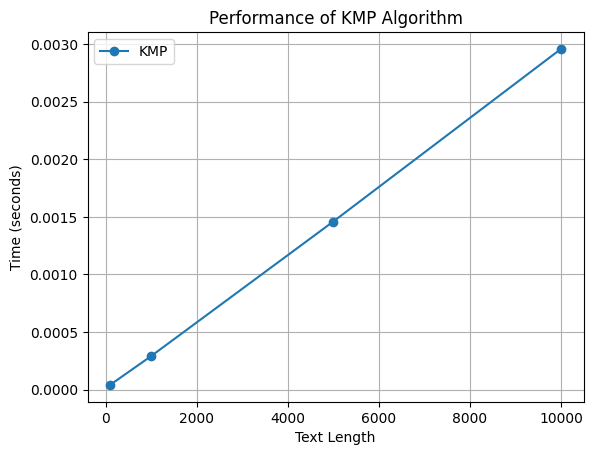

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

def benchmark_kmp():
    text_lengths = [100, 1000, 5000, 10000]
    pattern_length = 10
    kmp_times = []

    for text_length in text_lengths:
        text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

        # Benchmark KMP Algorithm
        start_time = time.time()
        kmp_matcher(text, pattern)
        kmp_times.append(time.time() - start_time)

    # Plot results
    plt.plot(text_lengths, kmp_times, label='KMP', marker='o')
    plt.xlabel("Text Length")
    plt.ylabel("Time (seconds)")
    plt.title("Performance of KMP Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Run Benchmark
benchmark_kmp()


#COMPARING PERFORMANCE OF ALL STRING MATCHING ALGORITHMS

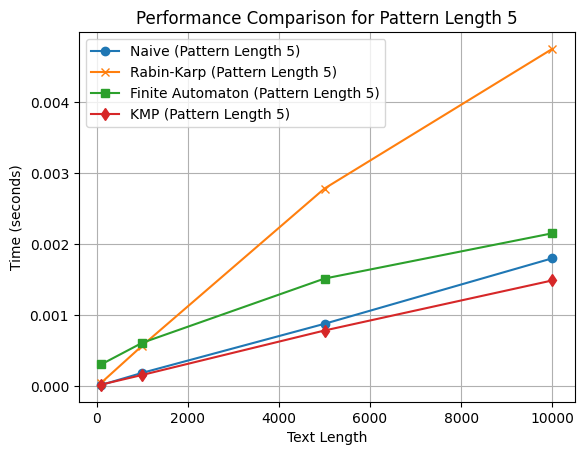

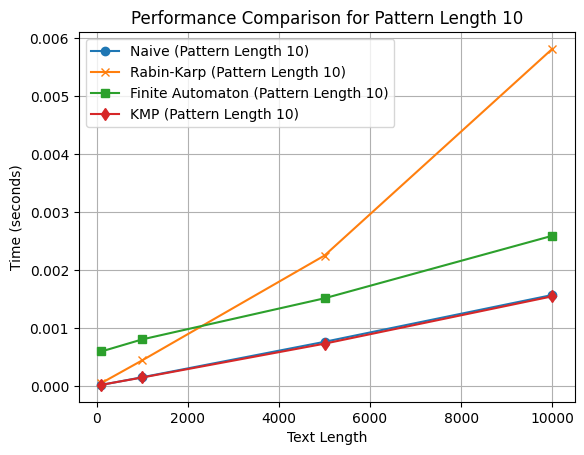

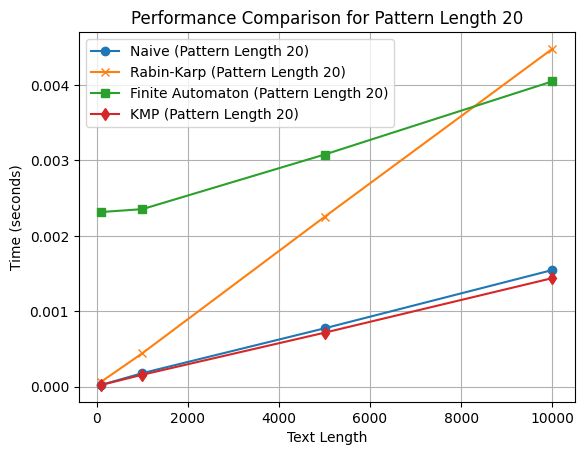

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# Helper function to generate text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Benchmarking all algorithms
def benchmark_with_preprocessing():
    text_lengths = [100, 1000, 5000, 10000]
    pattern_lengths = [5, 10, 20]
    results = []

    for pattern_length in pattern_lengths:
        naive_times = []
        rabin_karp_times = []
        finite_automaton_times = []
        kmp_times = []

        for text_length in text_lengths:
            text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

            # Naive Algorithm
            start_time = time.time()
            naive_string_matcher(text, pattern)
            naive_times.append(time.time() - start_time)

            # Rabin-Karp Algorithm
            start_time = time.time()
            rabin_karp_matcher(text, pattern)
            rabin_karp_times.append(time.time() - start_time)

            # Finite Automaton Algorithm
            start_preprocess = time.time()
            finite_automaton_matcher(text, pattern)
            finite_automaton_times.append(time.time() - start_preprocess)

            # KMP Algorithm
            start_preprocess = time.time()
            kmp_matcher(text, pattern)
            kmp_times.append(time.time() - start_preprocess)

        results.append({
            "pattern_length": pattern_length,
            "naive": naive_times,
            "rabin_karp": rabin_karp_times,
            "finite_automaton": finite_automaton_times,
            "kmp": kmp_times,
        })

    return text_lengths, results

# Run Benchmark
text_lengths, results = benchmark_with_preprocessing()

# Visualization
for result in results:
    pattern_length = result["pattern_length"]
    plt.plot(text_lengths, result["naive"], label=f'Naive (Pattern Length {pattern_length})', marker='o')
    plt.plot(text_lengths, result["rabin_karp"], label=f'Rabin-Karp (Pattern Length {pattern_length})', marker='x')
    plt.plot(text_lengths, result["finite_automaton"], label=f'Finite Automaton (Pattern Length {pattern_length})', marker='s')
    plt.plot(text_lengths, result["kmp"], label=f'KMP (Pattern Length {pattern_length})', marker='d')
    plt.xlabel("Text Length")
    plt.ylabel("Time (seconds)")
    plt.title(f"Performance Comparison for Pattern Length {pattern_length}")
    plt.legend()
    plt.grid()
    plt.show()


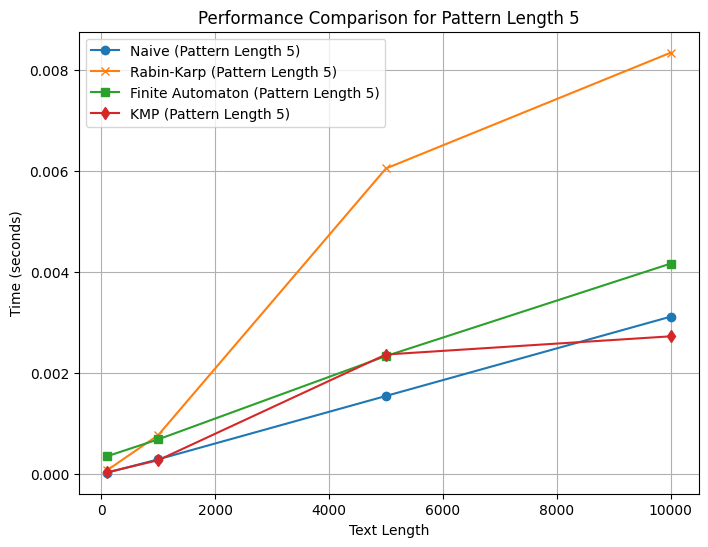

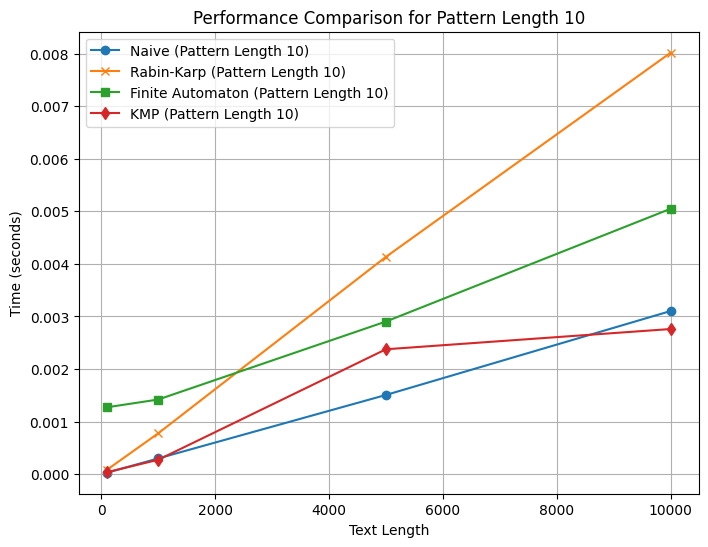

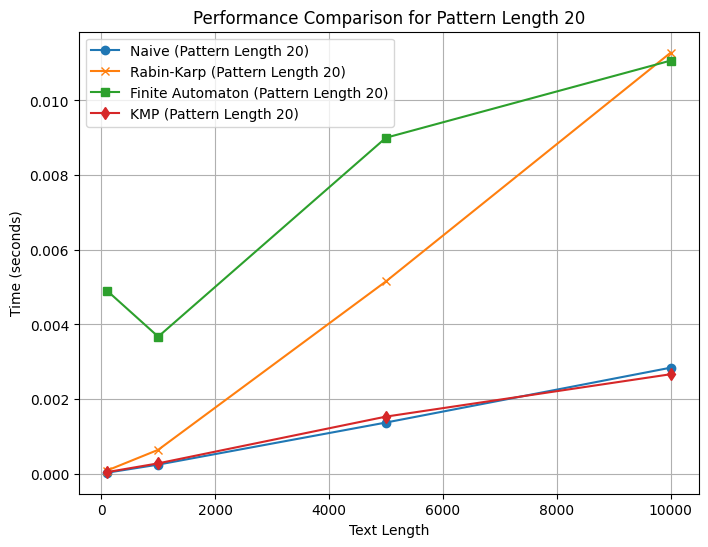

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# Helper function to generate text and pattern
def generate_random_text_and_pattern(text_length, pattern_length):
    text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    return text, pattern

# Naive Algorithm
def naive_string_matcher(text, pattern):
    n = len(text)
    m = len(pattern)
    for s in range(n - m + 1):
        if text[s:s + m] == pattern:
            pass

# Rabin-Karp Algorithm
def rabin_karp_matcher(text, pattern, d=256, q=101):
    n = len(text)
    m = len(pattern)
    h = pow(d, m - 1) % q
    p = 0
    t = 0
    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q
    for s in range(n - m + 1):
        if p == t:
            if text[s:s + m] == pattern:
                pass
        if s < n - m:
            t = (d * (t - ord(text[s]) * h) + ord(text[s + m])) % q

# Finite Automaton Algorithm
def compute_transition_function(pattern, alphabet):
    m = len(pattern)
    delta = {}
    for q in range(m + 1):
        for a in alphabet:
            k = q
            while k > 0 and (pattern[:k] != (pattern[:q] + a)[-k:]):
                k -= 1
            delta[(q, a)] = k
    return delta

def finite_automaton_matcher(text, pattern):
    alphabet = set(text + pattern)
    delta = compute_transition_function(pattern, alphabet)
    n = len(text)
    m = len(pattern)
    q = 0
    for i in range(n):
        q = delta.get((q, text[i]), 0)
        if q == m:
            pass

# Knuth-Morris-Pratt Algorithm
def compute_prefix_function(pattern):
    m = len(pattern)
    prefix = [0] * m
    k = 0
    for q in range(1, m):
        while k > 0 and pattern[k] != pattern[q]:
            k = prefix[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        prefix[q] = k
    return prefix

def kmp_matcher(text, pattern):
    n = len(text)
    m = len(pattern)
    prefix = compute_prefix_function(pattern)
    q = 0
    for i in range(n):
        while q > 0 and pattern[q] != text[i]:
            q = prefix[q - 1]
        if pattern[q] == text[i]:
            q += 1
        if q == m:
            q = prefix[q - 1]

# Benchmarking Function
def benchmark_with_preprocessing():
    text_lengths = [100, 1000, 5000, 10000]
    pattern_lengths = [5, 10, 20]
    results = []

    for pattern_length in pattern_lengths:
        naive_times = []
        rabin_karp_times = []
        finite_automaton_times = []
        kmp_times = []

        for text_length in text_lengths:
            text, pattern = generate_random_text_and_pattern(text_length, pattern_length)

            # Naive Algorithm
            start_time = time.time()
            naive_string_matcher(text, pattern)
            naive_times.append(time.time() - start_time)

            # Rabin-Karp Algorithm
            start_time = time.time()
            rabin_karp_matcher(text, pattern)
            rabin_karp_times.append(time.time() - start_time)

            # Finite Automaton Algorithm
            start_preprocess = time.time()
            finite_automaton_matcher(text, pattern)
            finite_automaton_times.append(time.time() - start_preprocess)

            # KMP Algorithm
            start_preprocess = time.time()
            kmp_matcher(text, pattern)
            kmp_times.append(time.time() - start_preprocess)

        results.append({
            "pattern_length": pattern_length,
            "naive": naive_times,
            "rabin_karp": rabin_karp_times,
            "finite_automaton": finite_automaton_times,
            "kmp": kmp_times,
        })

    return text_lengths, results

# Run Benchmark and Plot Results
text_lengths, results = benchmark_with_preprocessing()

for result in results:
    pattern_length = result["pattern_length"]
    plt.figure(figsize=(8, 6))
    plt.plot(text_lengths, result["naive"], label=f'Naive (Pattern Length {pattern_length})', marker='o')
    plt.plot(text_lengths, result["rabin_karp"], label=f'Rabin-Karp (Pattern Length {pattern_length})', marker='x')
    plt.plot(text_lengths, result["finite_automaton"], label=f'Finite Automaton (Pattern Length {pattern_length})', marker='s')
    plt.plot(text_lengths, result["kmp"], label=f'KMP (Pattern Length {pattern_length})', marker='d')
    plt.xlabel("Text Length")
    plt.ylabel("Time (seconds)")
    plt.title(f"Performance Comparison for Pattern Length {pattern_length}")
    plt.legend()
    plt.grid()
    plt.show()


#RUN TIME COMPARISON

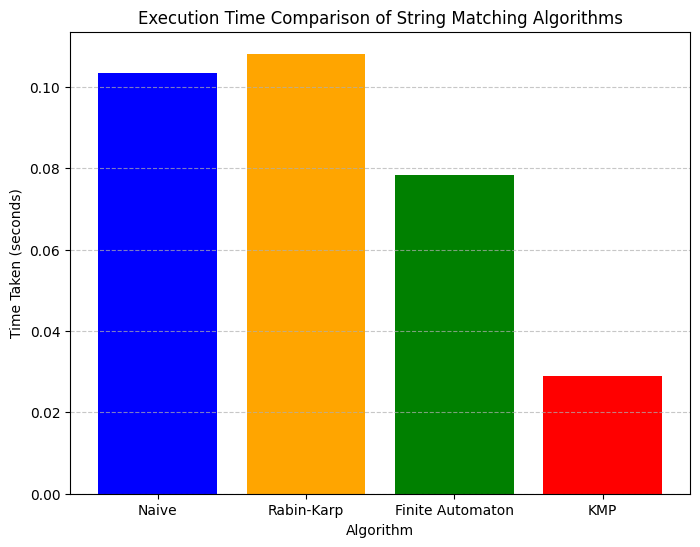

In [16]:
import matplotlib.pyplot as plt

# Updated Benchmarking results including KMP
algorithms = ["Naive", "Rabin-Karp", "Finite Automaton", "KMP"]
execution_times = [0.10345, 0.10818, 0.07831, 0.02895]  # Average times

# Plotting the updated results
plt.figure(figsize=(8, 6))
plt.bar(algorithms, execution_times, color=["blue", "orange", "green", "red"])
plt.xlabel("Algorithm")
plt.ylabel("Time Taken (seconds)")
plt.title("Execution Time Comparison of String Matching Algorithms")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
